In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds-prices/Diamonds Prices2022.csv


In [2]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import learning_curve

In [3]:
#IMPORTING DATASETS
df = pd.read_csv('../input/diamonds-prices/Diamonds Prices2022.csv')
print('Dataset imported successfully\n')

Dataset imported successfully



In [4]:
#NO OF ROWS AND COLUMNS
print('Dataset contains {} rows and {} columns.\n'.format(df.shape[0],df.shape[1]))
df.info()
print('\n')
df.head()

Dataset contains 53943 rows and 11 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB




,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
#NUBER OF NULL VALUES

df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
#SEPARATION OF NUMERICAL AND CATEGORICAL COLUMNS
num = df.select_dtypes('number')
cat = df.select_dtypes('O')
for c in cat.columns:
    print(cat[c].unique())
for n in num.columns:
    print(num[n].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
[    1     2     3 ... 53941 53942 53943]
[0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3. 

In [7]:
#DESCRIBING THE DATA
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53943.0,26972.000000,15572.147122,1.0,13486.50,26972.00,40457.50,53943.00
carat,53943.0,0.797935,0.473999,0.2,0.40,0.70,1.04,5.01
depth,53943.0,61.749322,1.432626,43.0,61.00,61.80,62.50,79.00
table,53943.0,57.457251,2.234549,43.0,56.00,57.00,59.00,95.00
price,53943.0,3932.734294,3989.338447,326.0,950.00,2401.00,5324.00,18823.00
x,53943.0,5.731158,1.121730,0.0,4.71,5.70,6.54,10.74
y,53943.0,5.734526,1.142103,0.0,4.72,5.71,6.54,58.90
z,53943.0,3.538730,0.705679,0.0,2.91,3.53,4.04,31.80


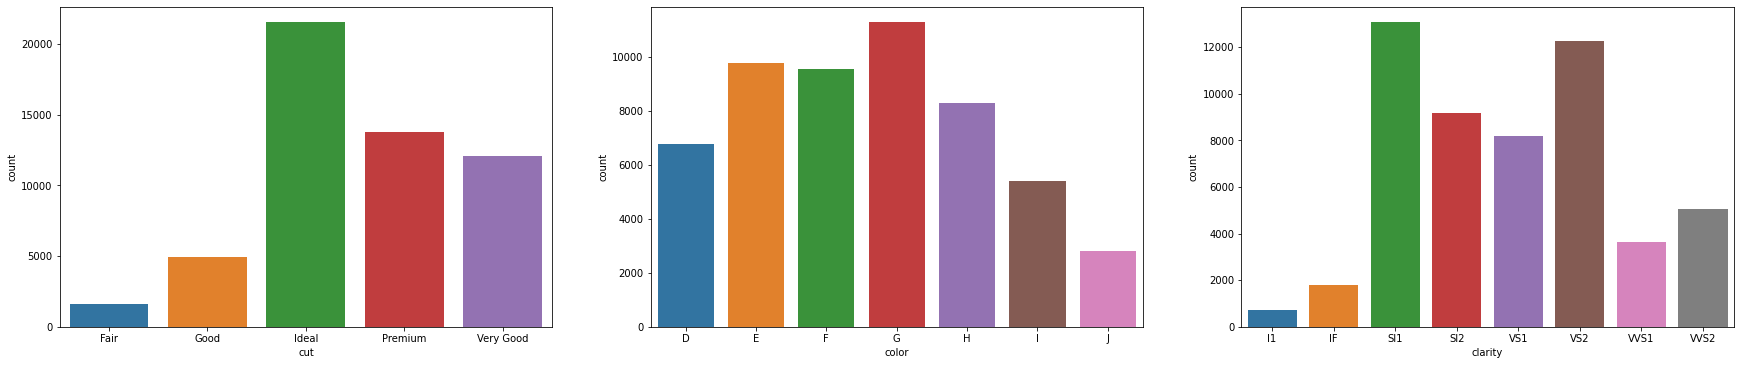

In [8]:
#Visualising categorical distributions
i = 1
plt.figure(figsize=(30,20))
for x in cat.columns:
    plt.subplot(3, 3, i)
    sns.countplot(x=df[x].sort_values())
    i+=1

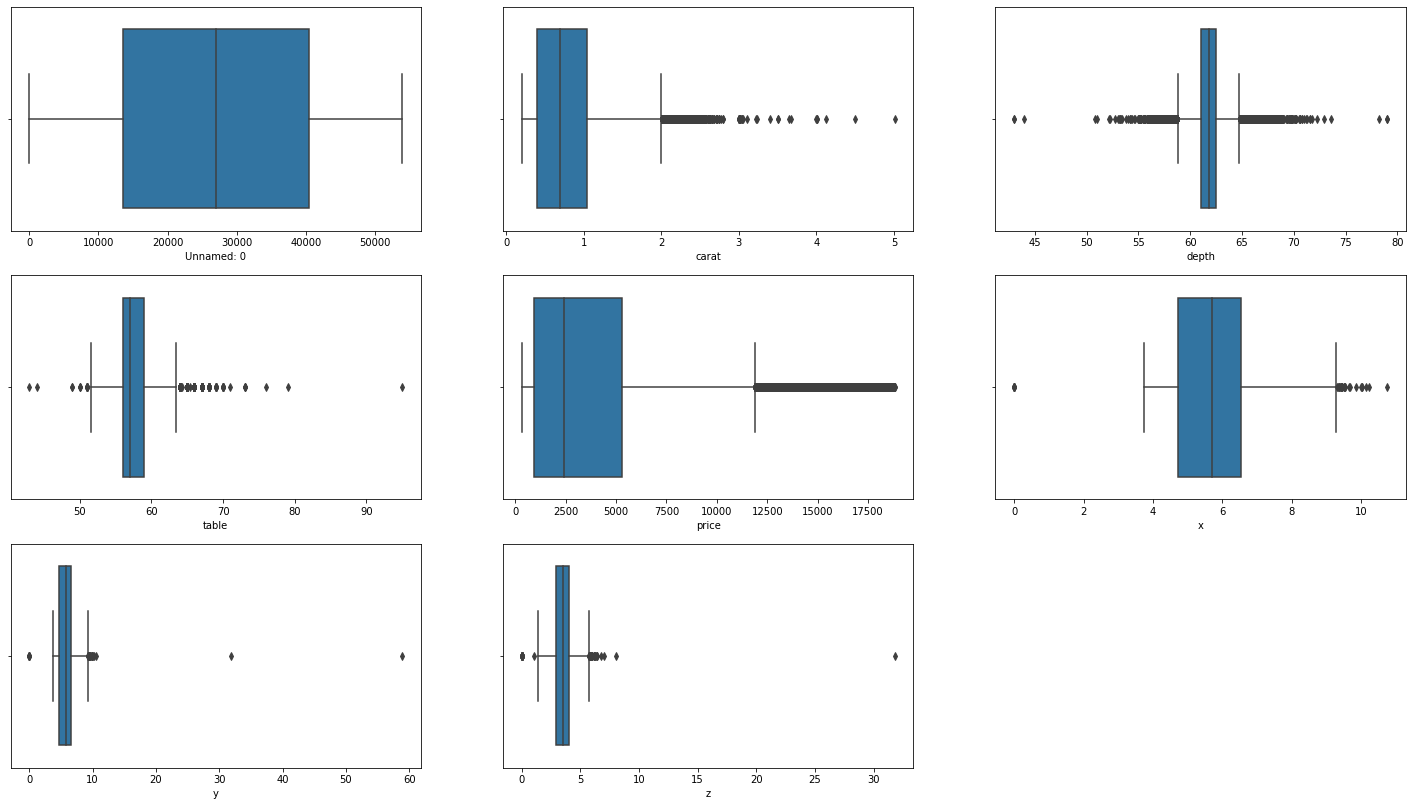

In [9]:
#handling outliers
i = 1
plt.figure(figsize=(25, 14))
for y in num.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[y])
    i+=1


In [10]:

#NUMBER OF OUTLIERS 
df.isna().sum()
df.dtypes
df.describe()
lower_bound = []
upper_bound = []
numerics = ['float64','int64']
outliers = 0
df1 = df.select_dtypes(include=numerics)
for col in df1.columns.values:
        Q1=(np.percentile(df1[col],25))
        Q3=(np.percentile(df1[col],75))
        iqr=(Q3-Q1)
        upper_bound = (Q3 +(1.5*iqr))
        lower_bound = (Q1 -(1.5*iqr)) 
        for val in df1[col]:
            if(val < lower_bound or val > upper_bound):
                outliers += 1
outliers

8689

No inconsistencies - inferred from unique values of each column

In [11]:
dup=df[df.duplicated()]
print("Duplicate rows: ",dup)

Duplicate rows:  Empty DataFrame
Columns: [Unnamed: 0, carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []


In [12]:
df.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377970,-0.034896,-0.100764,-0.306875,-0.405405,-0.395809,-0.399185
carat,-0.377970,1.000000,0.028234,0.181602,0.921591,0.975093,0.951721,0.953387
depth,-0.034896,0.028234,1.000000,-0.295798,-0.010630,-0.025289,-0.029340,0.094927
table,-0.100764,0.181602,-0.295798,1.000000,0.127118,0.195333,0.183750,0.150915
price,-0.306875,0.921591,-0.010630,0.127118,1.000000,0.884433,0.865419,0.861249
x,-0.405405,0.975093,-0.025289,0.195333,0.884433,1.000000,0.974701,0.970771
y,-0.395809,0.951721,-0.029340,0.183750,0.865419,0.974701,1.000000,0.952005
z,-0.399185,0.953387,0.094927,0.150915,0.861249,0.970771,0.952005,1.000000


In [13]:
df.corr(method='spearman')

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.416483,-0.046941,-0.113516,-0.404477,-0.414983,-0.416777,-0.414863
carat,-0.416483,1.000000,0.030098,0.194972,0.962886,0.996116,0.995571,0.993183
depth,-0.046941,0.030098,1.000000,-0.245088,0.010009,-0.023450,-0.025432,0.103495
table,-0.113516,0.194972,-0.245088,1.000000,0.171781,0.202222,0.195728,0.159871
price,-0.404477,0.962886,0.010009,0.171781,1.000000,0.963199,0.962722,0.957235
x,-0.414983,0.996116,-0.023450,0.202222,0.963199,1.000000,0.997895,0.987355
y,-0.416777,0.995571,-0.025432,0.195728,0.962722,0.997895,1.000000,0.987067
z,-0.414863,0.993183,0.103495,0.159871,0.957235,0.987355,0.987067,1.000000


In [14]:
df.corr(method='kendall')

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.135527,-0.032417,-0.080505,0.001991,-0.132830,-0.133216,-0.138422
carat,-0.135527,1.000000,0.019720,0.139141,0.834110,0.960601,0.957370,0.951231
depth,-0.032417,0.019720,1.000000,-0.178699,0.005740,-0.018143,-0.019537,0.070941
table,-0.080505,0.139141,-0.178699,1.000000,0.121700,0.143537,0.138715,0.112474
price,0.001991,0.834110,0.005740,0.121700,1.000000,0.830560,0.829339,0.819296
x,-0.132830,0.960601,-0.018143,0.143537,0.830560,1.000000,0.968240,0.912577
y,-0.133216,0.957370,-0.019537,0.138715,0.829339,0.968240,1.000000,0.911312
z,-0.138422,0.951231,0.070941,0.112474,0.819296,0.912577,0.911312,1.000000
